In [1]:
!wget https://www.dropbox.com/s/tlxserrdhe240lu/archive.zip

--2021-11-05 18:54:48--  https://www.dropbox.com/s/tlxserrdhe240lu/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tlxserrdhe240lu/archive.zip [following]
--2021-11-05 18:54:48--  https://www.dropbox.com/s/raw/tlxserrdhe240lu/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc469c567888dfac524ec6b5410d.dl.dropboxusercontent.com/cd/0/inline/BZaVBKN_CDqy46pIK4I7-8MZZnqayMKYohZeM_5HJE9bAoE_GjWDQ2pwwEtkwnctgxOTTsO-XykbUs_HR2AgCL30WDUidPcpLH2GjN_6uiTrrVocmw-8Yh9AS7u2LS2iRBO8prdGJsJFeAiH2sdgwMz3/file# [following]
--2021-11-05 18:54:49--  https://uc469c567888dfac524ec6b5410d.dl.dropboxusercontent.com/cd/0/inline/BZaVBKN_CDqy46pIK4I7-8MZZnqayMKYohZeM_5HJE9bAoE_GjWDQ2pwwEtkwnctgxOTTsO-XykbUs_HR2AgCL30WD

In [2]:
import zipfile
unzip = zipfile.ZipFile("archive.zip","r")
unzip.extractall()
unzip.close()

In [3]:
train_dir = "/content/chest_xray/train/"
test_dir = "/content/chest_xray/test/"
val_dir = "/content/chest_xray/val/"


In [4]:
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./225)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./225)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./225)



In [5]:
train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (224,224),
                                           class_mode = "binary",
                                           batch_size = 64
                                           )
test_data = test_gen.flow_from_directory(test_dir,
                                         target_size = (224,224),
                                         class_mode = "binary",
                                         batch_size = 64
                                         )
val_data = val_gen.flow_from_directory(val_dir,
                                       target_size = (224,224),
                                       class_mode = "binary",
                                       batch_size = 64
                                       )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [32]:
# building a CNN model
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
                             layers.Conv2D(filters= 10, kernel_size= 2, activation= "relu", input_shape=(224,224,3)),
                             layers.Dropout(0.2),
                             layers.Conv2D(filters= 10, kernel_size= 2, activation= "relu"),
                             layers.Dropout(0.2),
                             layers.Conv2D(filters= 10, kernel_size= 2, activation="relu"),
                             layers.MaxPool2D(),

                             layers.Flatten(),

                             layers.Dense(1, activation= "sigmoid")
])



In [34]:
# compiling the model

model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [35]:
# fitting the model

model.fit(
    train_data, 
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = val_data,
    validation_steps = len(val_data)
)

Epoch 1/10
82/82 [==============================] - 322s 4s/step - loss: 0.3796 - accuracy: 0.8654 - val_loss: 0.5542 - val_accuracy: 0.6250
Epoch 2/10
82/82 [==============================] - 317s 4s/step - loss: 0.1309 - accuracy: 0.9490 - val_loss: 0.7234 - val_accuracy: 0.6250
Epoch 3/10
82/82 [==============================] - 315s 4s/step - loss: 0.1063 - accuracy: 0.9584 - val_loss: 0.3247 - val_accuracy: 0.7500
Epoch 4/10
82/82 [==============================] - 316s 4s/step - loss: 0.0766 - accuracy: 0.9720 - val_loss: 0.6347 - val_accuracy: 0.6250
Epoch 5/10
82/82 [==============================] - 314s 4s/step - loss: 0.0615 - accuracy: 0.9768 - val_loss: 0.5083 - val_accuracy: 0.6875
Epoch 6/10
82/82 [==============================] - 315s 4s/step - loss: 0.0490 - accuracy: 0.9810 - val_loss: 0.7043 - val_accuracy: 0.5625
Epoch 7/10
82/82 [==============================] - 321s 4s/step - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.4170 - val_accuracy: 0.8125
Epoch 8/10
82

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 223, 223, 10)      130       
_________________________________________________________________
dropout_12 (Dropout)         (None, 223, 223, 10)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 222, 222, 10)      410       
_________________________________________________________________
dropout_13 (Dropout)         (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 221, 221, 10)      410       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 121000)           

In [38]:
model_evaluation = model.evaluate(test_data)

10/10 [==============================] - 15s 1s/step - loss: 1.2307 - accuracy: 0.7837


In [39]:
print(f"Model Accuracy: {model_evaluation[1]*100: 0.2f}%")

Model Accuracy:  78.37%


##**Model building using transfer learning**

In [6]:
# importing resnet model 

import tensorflow as tf
from tensorflow.keras import layers

base_model = tf.keras.applications.ResNet50V2(include_top= False, input_shape=(224,224,3), weights= "imagenet")




94683136/94668760 [==============================] - 2s 0us/step


In [15]:
# building a resnet50V2 model
for layer in base_model.layers[:-3]:
  base_model.trainable = False

resnet_model = tf.keras.Sequential([
                                    base_model,
                                    layers.GlobalAveragePooling2D(),
                                    layers.Dense(1, activation="sigmoid")
])

In [16]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2049      
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [17]:
# compiling the model

resnet_model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [18]:
# fitting the model

resnet_model.fit(train_data,
                 epochs = 5,
                 steps_per_epoch= len(train_data),
                 validation_data = val_data,
                 validation_steps = len(val_data)
                 )

Epoch 1/5
82/82 [==============================] - 72s 826ms/step - loss: 0.2247 - accuracy: 0.9084 - val_loss: 0.3766 - val_accuracy: 0.8750
Epoch 2/5
82/82 [==============================] - 67s 816ms/step - loss: 0.1287 - accuracy: 0.9534 - val_loss: 0.3260 - val_accuracy: 0.8125
Epoch 3/5
82/82 [==============================] - 67s 815ms/step - loss: 0.1061 - accuracy: 0.9630 - val_loss: 0.4555 - val_accuracy: 0.7500
Epoch 4/5
82/82 [==============================] - 67s 814ms/step - loss: 0.0936 - accuracy: 0.9676 - val_loss: 0.3791 - val_accuracy: 0.8125
Epoch 5/5
82/82 [==============================] - 66s 804ms/step - loss: 0.0857 - accuracy: 0.9711 - val_loss: 0.4391 - val_accuracy: 0.7500


In [19]:
resnet_model_evaluation = resnet_model.evaluate(test_data)

10/10 [==============================] - 7s 694ms/step - loss: 0.5521 - accuracy: 0.7997


In [20]:
print(f"Resnet Model Accuracy: {resnet_model_evaluation[1]*100: 0.2f}%")

Resnet Model Accuracy:  79.97%


In [21]:
# saving the model

resnet_model.save("chestxray.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [24]:
model_prediction = resnet_model.predict(test_data)

In [27]:
prediction = tf.squeeze(tf.round(model_prediction))

prediction

<tf.Tensor: shape=(624,), dtype=float32, numpy=
array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1

In [76]:

sample_pneumonia = tf.keras.preprocessing.image.load_img("/content/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg", target_size=(224,224,3))
sample_normal = tf.keras.preprocessing.image.load_img("/content/chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg", target_size=(224,224,3))



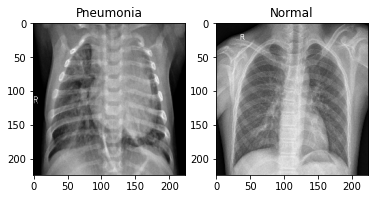

In [77]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(sample_pneumonia)
plt.title("Pneumonia")
plt.subplot(1,2,2)
plt.imshow(sample_normal)
plt.title("Normal")
plt.show()

In [78]:
import numpy as np
def image_process(image):
  sample_image = tf.keras.preprocessing.image.img_to_array(sample)
  sample_image = sample_image/255.
  sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)
  sample_image = np.expand_dims(sample_image, axis =0)
  return sample_image

In [79]:
normal_img = image_process(sample_normal)
pneumonia_img = image_process(sample_pneumonia)

In [80]:
normal_img.shape, pneumonia_img.shape

((1, 224, 224, 3), (1, 224, 224, 3))

In [81]:
prediction_normal = resnet_model.predict(normal_img)
prediction_pneumonia = resnet_model.predict(pneumonia_img)

In [82]:
def display_prdiction(prediction, image):
  if prediction[0][0] == 1:
    plt.imshow(image)
    plt.title("Normal")
  else:
    plt.imshow(image)
    plt.title("Pneumonia")

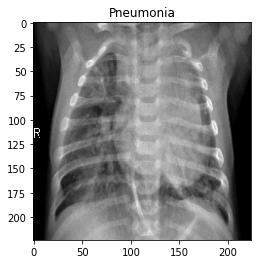

In [83]:

display_prdiction(prediction_pneumonia, sample_pneumonia)

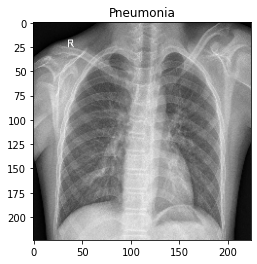

In [84]:
display_prdiction(prediction_normal, sample_normal)